In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')

df.head()

C:\Users\rushi\AppData\Local\Temp\ipykernel_119008\249104501.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"


In [10]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
crashes_based_weather = df.groupby(['Weather', 'Surface Condition','Light']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)

In [5]:
crashes_based_weather

,Weather,Surface Condition,Light,Count
22,CLEAR,DRY,DAYLIGHT,68199
19,CLEAR,DRY,DARK LIGHTS ON,22542
174,RAINING,WET,DAYLIGHT,11118
73,CLOUDY,DRY,DAYLIGHT,10031
171,RAINING,WET,DARK LIGHTS ON,5798
...,...,...,...,...
258,UNKNOWN,SLUSH,DARK LIGHTS ON,1
259,UNKNOWN,SNOW,DAYLIGHT,1
260,UNKNOWN,SNOW,UNKNOWN,1
114,FOGGY,ICE,DARK LIGHTS ON,1


C:\Users\rushi\AppData\Local\Temp\ipykernel_57024\3301265149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_7['Category'] = top_7['Weather'] + ', ' + top_7['Surface Condition'] + ', ' + top_7['Light']
C:\Users\rushi\AppData\Local\Temp\ipykernel_57024\3301265149.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Category', data=top_7, palette='viridis')


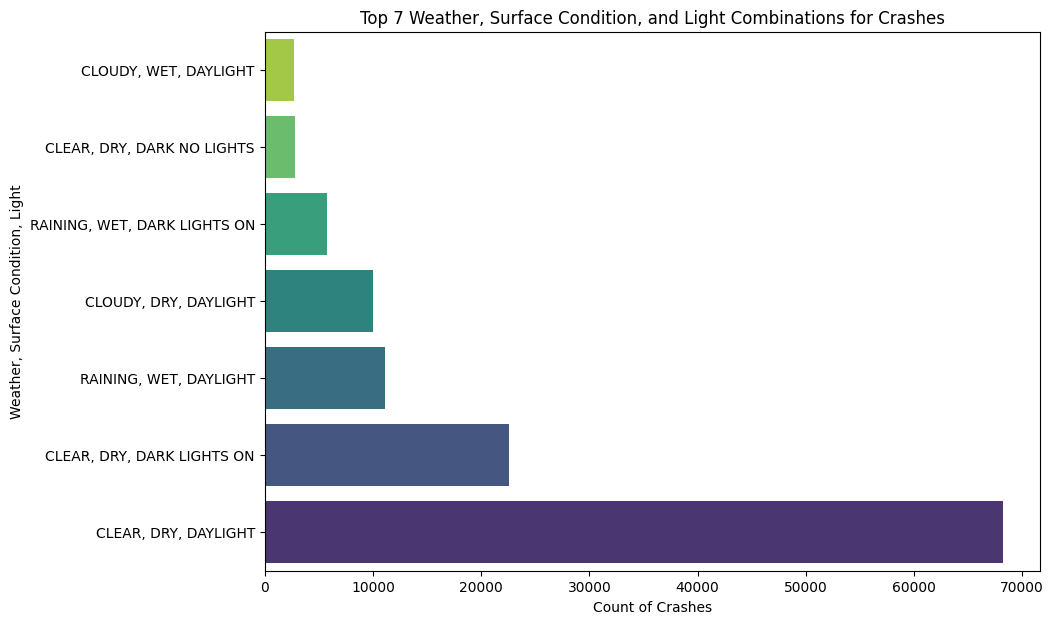

In [6]:

# Selecting the top 7
top_7 = crashes_based_weather.head(7)

# Creating a new column for the combined category label
top_7['Category'] = top_7['Weather'] + ', ' + top_7['Surface Condition'] + ', ' + top_7['Light']

# Plotting the data using seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='Count', y='Category', data=top_7, palette='viridis')
plt.xlabel('Count of Crashes')
plt.ylabel('Weather, Surface Condition, Light')
plt.title('Top 7 Weather, Surface Condition, and Light Combinations for Crashes')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

We can conclude that the majority of crashes occur in clear weather with dry surfaces and during daylight, totaling around 68,000 incidents. This is followed by conditions where daylight is absent but lights are on. This pattern is likely because Maryland typically experiences clear and dry weather conditions, leading to a higher number of incidents occurring under these conditions.

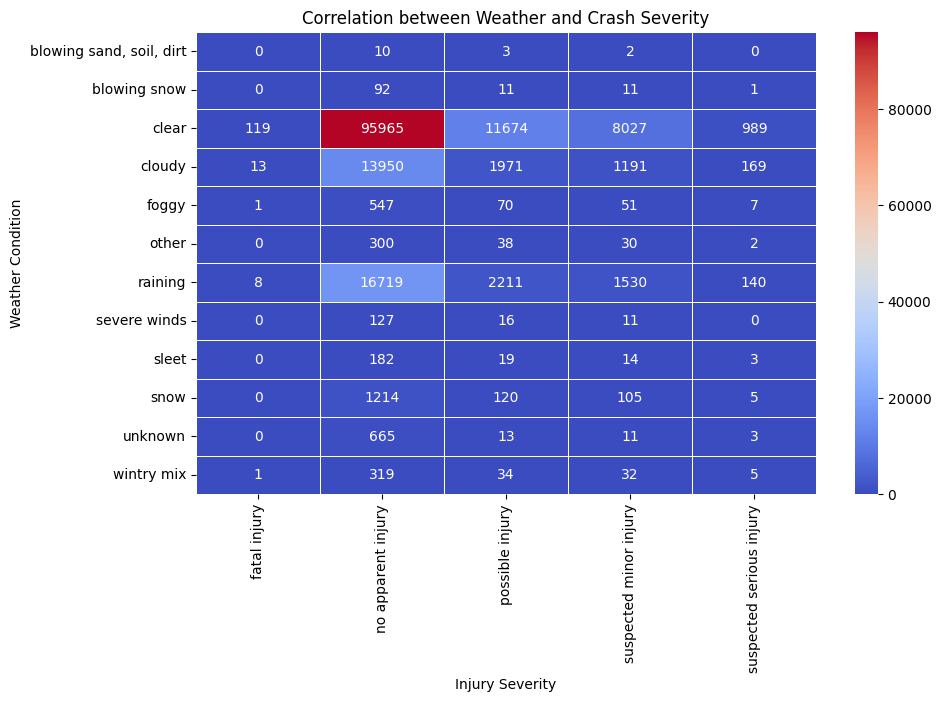

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame

# Data Preparation
df['Weather'] = df['Weather'].str.lower().str.strip()
df['Injury Severity'] = df['Injury Severity'].str.lower().str.strip()

# Data Aggregation
weather_severity = df.groupby(['Weather', 'Injury Severity']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(weather_severity, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Correlation between Weather and Crash Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Weather Condition')
plt.show()




The data indicates that clear weather conditions with dry surfaces and daylight contribute to the highest number of crashes, as evidenced by the approximately 95,965 incidents that fall under this category. This suggests a trend where crashes are more prevalent under seemingly optimal conditions. An explanation for this could be that Maryland typically experiences clear and dry weather, leading to a greater volume of vehicles on the road and hence a higher incidence rate. It’s noteworthy that crashes during daylight with lights on—when visibility is reduced—also represent a significant number of incidents, although to a lesser extent. This may reflect a higher level of caution among drivers when visibility is impaired, leading to fewer crashes than during clear daylight.

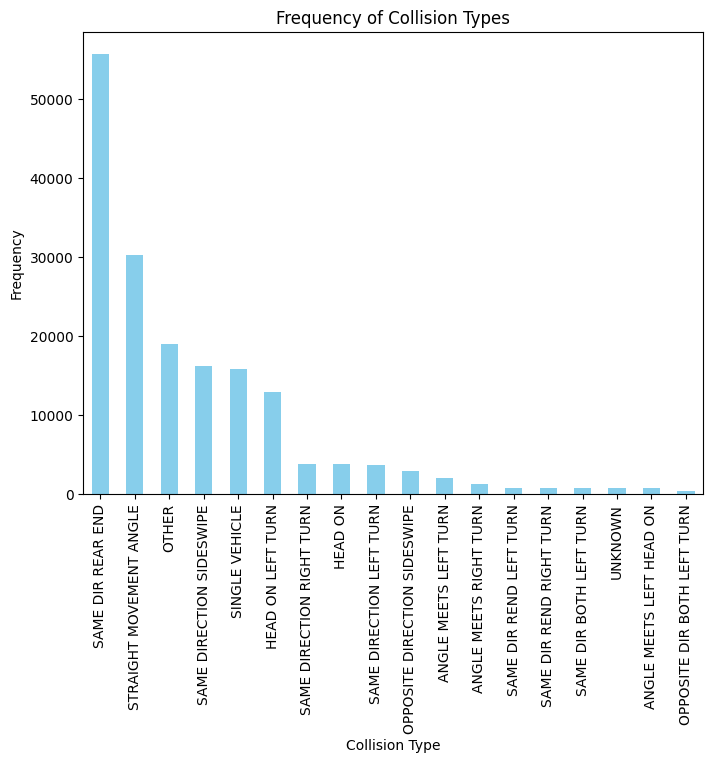

<Figure size 800x600 with 0 Axes>

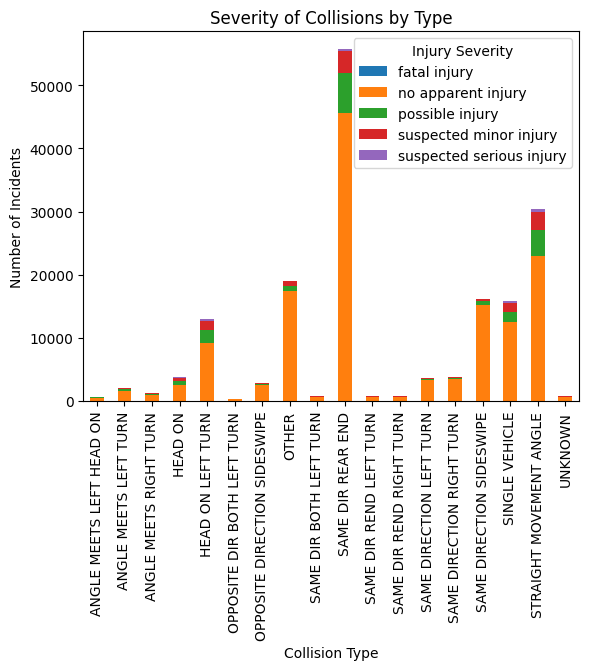

In [8]:
# Frequency of collision types
collision_counts = df['Collision Type'].value_counts()

# Severity within collision types
collision_severity = df.groupby(['Collision Type', 'Injury Severity']).size().unstack().fillna(0)

# Plotting
plt.figure(figsize=(8, 6))
collision_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Collision Types')
plt.xlabel('Collision Type')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
collision_severity.plot(kind='bar', stacked=True)
plt.title('Severity of Collisions by Type')
plt.xlabel('Collision Type')
plt.ylabel('Number of Incidents')
plt.legend(title='Injury Severity')
plt.show()


It is clear that the most common type of collision is a rear-end crash, which significantly outnumbers other types. 
The second most frequent collision type is a single vehicle incident, followed by angle collisions and sideswipes, which occur with somewhat similar frequencies. The least common types of collisions are related to turns, whether it be opposite direction, same direction right turn, or both left turn incidents. The prevalence of rear-end crashes may suggest issues such as tailgating, sudden stops, or distracted driving are prominent, whereas the less frequent turn-related crashes might indicate that these maneuvers pose a lower risk or that drivers are more cautious when performing them.

It’s evident that rear-end collisions are the most frequent, with a majority resulting in no apparent injury but a notable number of minor and serious injuries. The chart also highlights that while less common, head-on collisions and angle meets left turn accidents, though fewer in frequency, have a higher proportion of fatal, serious, and minor injuries, indicating these types of accidents are generally more severe. Overall, the chart conveys that the most common collision types may not necessarily correlate with the most severe outcomes in terms of injuries.

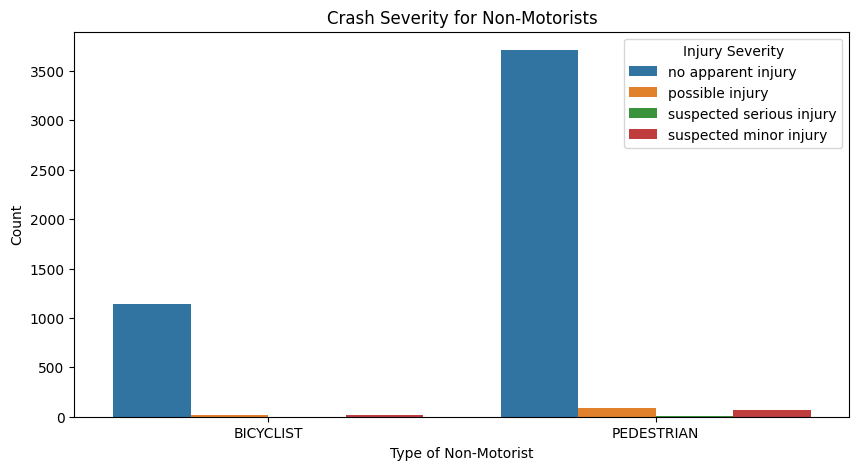

In [9]:
# Filtering non-motorist crashes
non_motorist_crashes = df[df['Related Non-Motorist'].isin(['BICYCLIST', 'PEDESTRIAN'])]

# Visualizing data
plt.figure(figsize=(10, 5))
sns.countplot(x='Related Non-Motorist', hue='Injury Severity', data=non_motorist_crashes)
plt.title('Crash Severity for Non-Motorists')
plt.xlabel('Type of Non-Motorist')
plt.ylabel('Count')
plt.legend(title='Injury Severity')
plt.show()


It shows that crashes involving pedestrians are substantially more frequent than those involving bicyclists. Furthermore, for both groups, the most common injury severity reported is "no apparent injury," followed by "possible injury," "suspected minor injury," and "suspected serious injury." Notably, the occurrence of suspected serious injuries is quite low for bicyclists, while for pedestrians, it is more pronounced, albeit still lower than the other categories. This data suggests that while pedestrians are more likely to be involved in a crash, the severity of injuries sustained by bicyclists and pedestrians varies, with pedestrians experiencing a greater proportion of serious injuries.

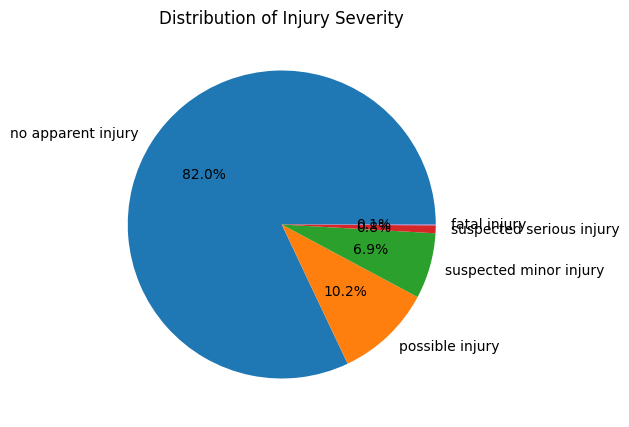

In [10]:
# Severity distribution
severity_distribution = df['Injury Severity'].value_counts()

# Visualizing the distribution
plt.figure(figsize=(8, 5))
severity_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Injury Severity')
plt.ylabel('')
plt.show()

# Example for factor analysis using logistic regression (assuming binary outcome for simplicity)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Binary encoding severity (assuming 'NO APPARENT INJURY' as '0' and all others as '1')
df['Severity_Code'] = (df['Injury Severity'] != 'NO APPARENT INJURY').astype(int)

# Selecting a subset of predictors
predictors = df[['Weather', 'Light', 'Traffic Control', 'Driver Substance Abuse']]
predictors = pd.get_dummies(predictors)




The largest segment, comprising 82% of the chart, indicates that most individuals involved in crashes have no apparent injury. Possible injuries account for 10.2% of the cases, suggesting minor impacts or uncertainties about the injuries' extent. Suspected minor injuries make up 6.9%, while suspected serious injuries are a smaller slice at 0.8%. Fatalities are the least common outcome, not visible in the chart, likely representing a very small percentage. This distribution underscores that while a significant majority of crashes do not result in visible injuries, there is still a noteworthy portion of incidents leading to varying levels of harm.

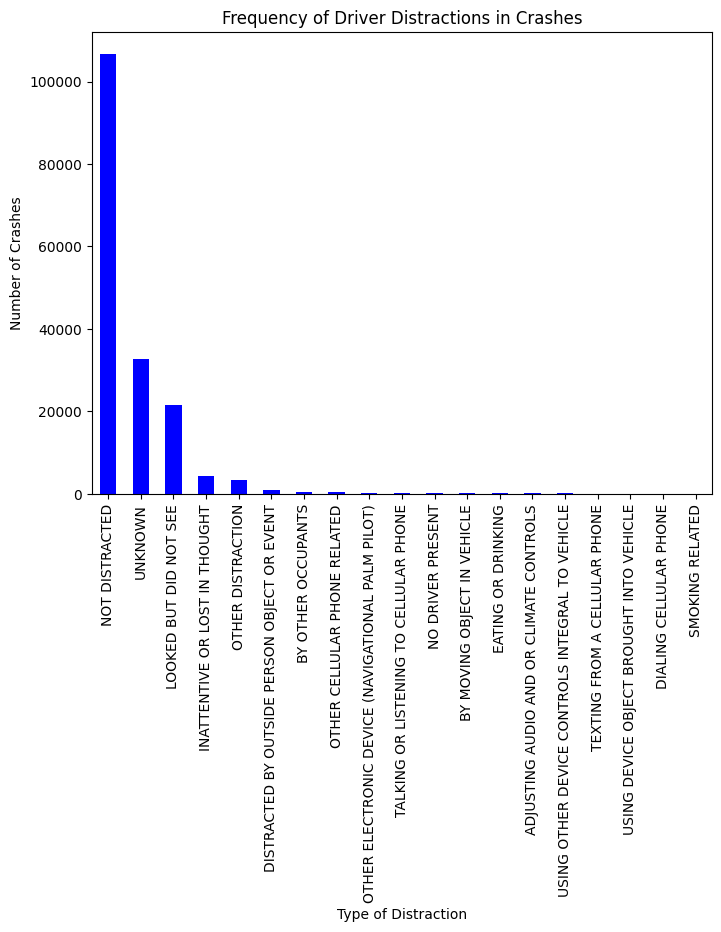

<Figure size 800x600 with 0 Axes>

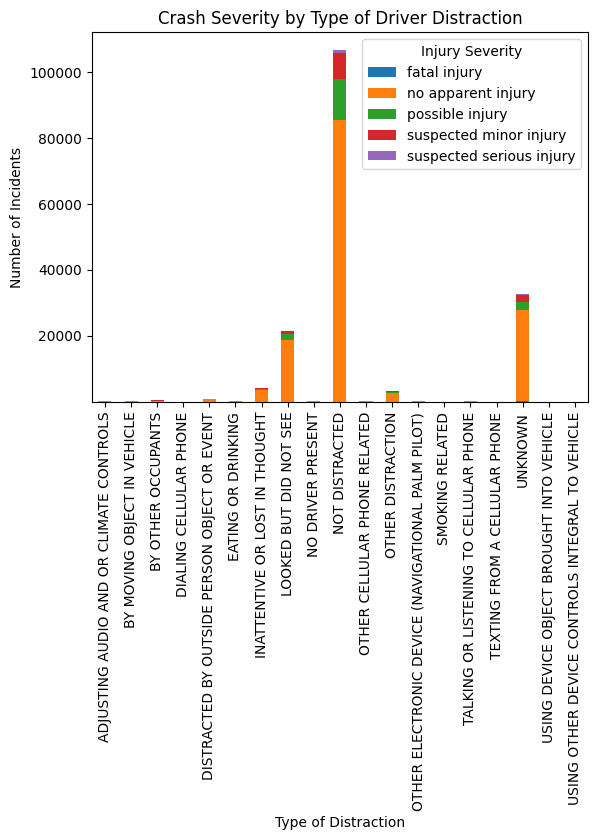

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame

# Frequency of distractions
distraction_counts = df['Driver Distracted By'].value_counts()

# Analyzing distraction by severity
distraction_severity = df.groupby(['Driver Distracted By', 'Injury Severity']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(8, 6))
distraction_counts.plot(kind='bar', color='blue')
plt.title('Frequency of Driver Distractions in Crashes')
plt.xlabel('Type of Distraction')
plt.ylabel('Number of Crashes')
plt.show()

plt.figure(figsize=(8, 6))
distraction_severity.plot(kind='bar', stacked=True)
plt.title('Crash Severity by Type of Driver Distraction')
plt.xlabel('Type of Distraction')
plt.ylabel('Number of Incidents')
plt.legend(title='Injury Severity')
plt.show()



The data reveals that the vast majority of crashes are attributed to drivers who are reportedly not distracted, suggesting that a lack of distraction does not necessarily equate to the absence of risk, with many of these incidents still leading to various injury levels. "Looked But Did Not See" ranks as the second most frequent distraction-related cause, implying that momentary lapses in attention or failure to recognize hazards are significant factors in crashes. While less common, distractions from phone use and other electronic devices are also notable for their injury associations. These findings highlight the complex nature of driving attentiveness and the need for increased focus behind the wheel to mitigate the risk of crashes.

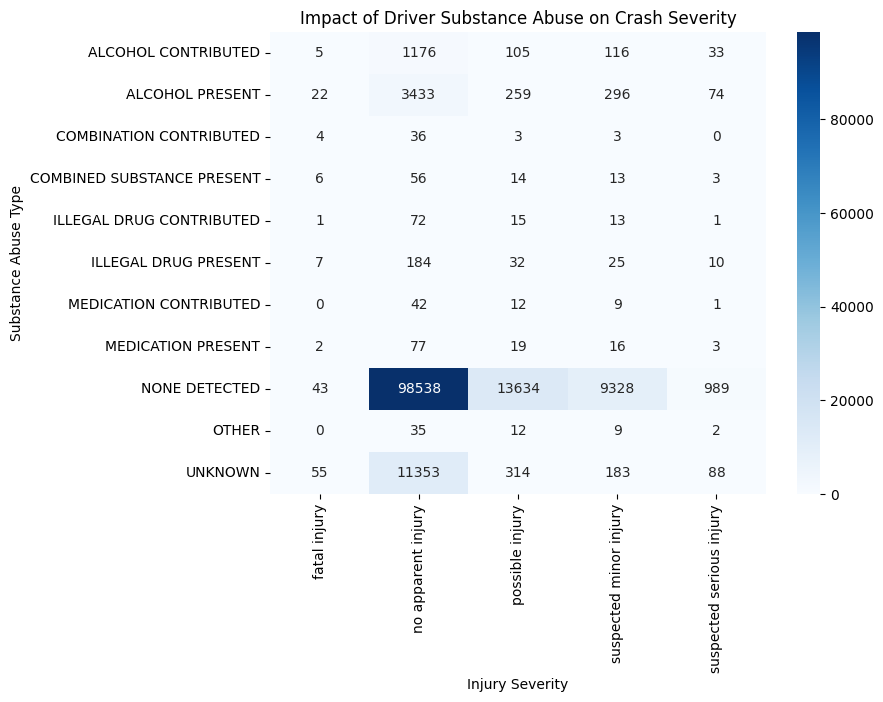

In [12]:
# Substance abuse analysis
substance_impact = df.groupby(['Driver Substance Abuse', 'Injury Severity']).size().unstack(fill_value=0)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(substance_impact, annot=True, cmap='Blues', fmt='d')
plt.title('Impact of Driver Substance Abuse on Crash Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Substance Abuse Type')
plt.show()


the correlation between different types of substance abuse by drivers and the severity of crashes. A vast majority of the crashes involved drivers where no substance abuse was detected, followed by a significant number where substance abuse was unknown. Among the incidents involving substance abuse, those with alcohol present show higher frequencies across all severity levels compared to other substances. Incidents with illegal drugs present, though less frequent, still show a concerning correlation with injury severity. Overall, the data suggests that while substance abuse is a contributing factor in a smaller portion of the
total crashes, its presence is associated with an increased severity in injuries, highlighting the dangers of driving under the influence.

### simple clustering

C:\Users\rushi\AppData\Local\Temp\ipykernel_156032\1890009957.py:14: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
C:\Users\rushi\AppData\Local\Temp\ipykernel_156032\1890009957.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = pipeline['kmeans'].labels_


Silhouette Score: 0.06660068496006684


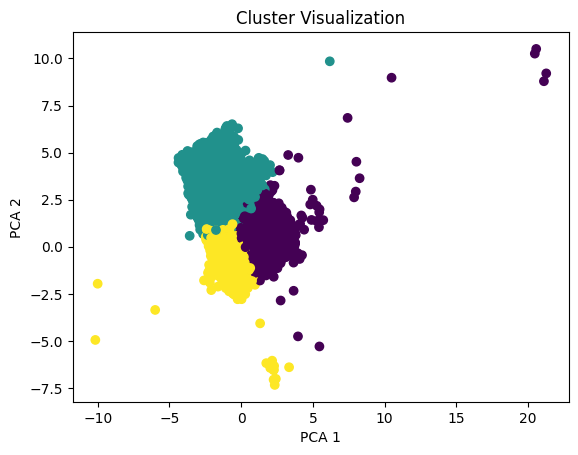

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Load the dataset
choosen_col = ['Agency Name', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']
target = 'Injury Severity'
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
df_sampled, _ = train_test_split(df, train_size=50000)
df = df_sampled[choosen_col]


# Define numerical and categorical features
numerical_features = df[choosen_col].select_dtypes(include=['number']).columns.tolist()

categorical_features= [col for col in df.select_dtypes(exclude=['number']).columns.tolist() if col != target]
# Create a column transformer with OneHotEncoder for categorical features and StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])

# Create a pipeline with the preprocessor and KMeans
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit and transform the data
pipeline.fit(df)
X_preprocessed = pipeline['preprocessor'].transform(df).toarray()  # Convert to dense array if sparse

# Assign clusters to the dataframe
df['Cluster'] = pipeline['kmeans'].labels_

# Evaluate Clustering
silhouette_avg = silhouette_score(X_preprocessed, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Cluster Visualization')
plt.show()


In [54]:
numerical_features = df[['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']].select_dtypes(include=['number']).columns.tolist()

categorical_features= df[['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']].select_dtypes(exclude=['number']).columns.tolist()




In [31]:
non_numeric_columns = ['Agency Name',
 'ACRS Report Type',
 'Crash Date/Time',
 'Route Type',
 'Road Name',
 'Cross-Street Type',
 'Cross-Street Name',
 'Collision Type',
 'Weather',
 'Surface Condition',
 'Light',
 'Traffic Control',
 'Driver Substance Abuse',
 'Driver At Fault',
 'Injury Severity',
 'Circumstance',
 'Driver Distracted By',
 'Drivers License State',
 'Vehicle Damage Extent',
 'Vehicle First Impact Location',
 'Vehicle Second Impact Location',
 'Vehicle Body Type',
 'Vehicle Movement',
 'Driverless Vehicle',
 'Parked Vehicle',
 'Vehicle Make',
 'Vehicle Model',
 'Equipment Problems']


for column in non_numeric_columns:
    unique_counts = df[column].value_counts(normalize=True) * 100
    print(unique_counts)


Agency Name
Montgomery County Police     80.394527
MONTGOMERY                    6.193312
Rockville Police Departme     5.716859
Gaithersburg Police Depar     4.557102
Takoma Park Police Depart     1.738474
Maryland-National Capital     0.671102
ROCKVILLE                     0.366056
GAITHERSBURG                  0.226606
TAKOMA                        0.091223
MCPARK                        0.044740
Name: proportion, dtype: float64
ACRS Report Type
Property Damage Crash    63.596061
Injury Crash             36.156997
Fatal Crash               0.246942
Name: proportion, dtype: float64
Crash Date/Time
12/10/2018 06:10:00 PM    0.006391
03/03/2017 06:00:00 AM    0.005810
06/09/2020 06:53:00 PM    0.005810
03/28/2019 09:30:00 AM    0.005810
05/02/2017 06:12:00 PM    0.005229
                            ...   
02/15/2023 10:05:00 AM    0.000581
08/06/2015 10:45:00 AM    0.000581
09/13/2015 04:25:00 PM    0.000581
10/19/2017 10:45:00 AM    0.000581
12/15/2022 09:00:00 AM    0.000581
Name: pro

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3170003V,240000438,Montgomery County Police,Property Damage Crash,01/03/2024 02:55:00 PM,NaN,NaN,NaN,NaN,IN FRONT OF 18900 BIRDSEYE DR,...,0,No,No,2017,LEXUS,SUV,NO MISUSE,39.165005,-77.249310,"(39.16500483, -77.24931)"
1,MCP3254003K,230072050,Montgomery County Police,Injury Crash,12/16/2023 12:36:00 PM,Maryland (State),GERMANTOWN RD,County,MIDDLEBROOK RD,NaN,...,35,No,No,2010,TOYT,PRIUS,NO MISUSE,39.178776,-77.267190,"(39.17877577, -77.26718974)"
2,EJ7887003Q,230074270,Gaithersburg Police Depar,Injury Crash,12/29/2023 12:00:00 PM,Maryland (State),GREAT SENECA HWY,Municipality,KENTLANDS BLVD,NaN,...,35,No,No,2021,SUBARU,FORRESTER,NO MISUSE,39.123574,-77.231769,"(39.12357374, -77.231769)"
3,MCP2674004J,230064598,Montgomery County Police,Property Damage Crash,11/05/2023 09:07:00 PM,Maryland (State),WOODFIELD RD,County,GLENDALOUGH RD,NaN,...,40,No,No,2019,DODGE,CHARGER,NO MISUSE,39.211742,-77.171461,"(39.21174219, -77.17146065)"
4,MCP25280008,230067019,Montgomery County Police,Property Damage Crash,11/18/2023 12:40:00 AM,Maryland (State),CLARKSBURG RD,Maryland (State),CLARKSBURG RD,NaN,...,20,No,No,2014,NISSAN,ROGUE,NaN,39.228915,-77.289091,"(39.22891483, -77.28909117)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172100,DM8338000C,16010228,Takoma Park Police Depart,Property Damage Crash,03/01/2016 10:01:00 AM,Municipality,NEW HAMPSHIRE SERVICE LA,Municipality,PRINCE GEORGES AVE,NaN,...,25,No,No,2016,FORD,EXPLORER,NO MISUSE,38.972560,-76.997466,"(38.97255976, -76.99746609)"
172101,MCP1182001S,170519976,Montgomery County Police,Property Damage Crash,07/19/2017 02:22:00 PM,County,CEDAR LA,Maryland (State),OLD GEORGETOWN RD,NaN,...,35,No,No,2008,NISSAN,ALTIMA,NO MISUSE,39.004640,-77.108502,"(39.00464, -77.10850167)"
172102,MCP1453008X,200046217,Montgomery County Police,Property Damage Crash,11/23/2020 07:37:00 AM,Maryland (State),RIDGE RD,Unknown,LITTLE SENECA PKWY,NaN,...,40,No,No,2008,CHEVROLET,EXPRESS,NO MISUSE,39.228963,-77.236757,"(39.22896333, -77.23675667)"
172103,MCP2568000M,190056701,Montgomery County Police,Property Damage Crash,11/23/2019 11:23:00 PM,County,SHADY GROVE RD,Ramp,RAMP 9 FR IS 370 EB TO SHADY GROVE RD,NaN,...,35,No,No,2018,FORD,TRANSIT VAN,NO MISUSE,39.120440,-77.180047,"(39.12043995, -77.18004738)"


### CatBoost,XGBoost,LGBM

C:\Users\rushi\AppData\Local\Temp\ipykernel_147376\449717722.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')


Index(['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type',
       'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity',
       'Circumstance', 'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model',
       'Equipment Problems', 'Latitude', 'Longitude'],
      dtype='object')


C:\Users\rushi\AppData\Local\Temp\ipykernel_147376\449717722.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5690
[LightGBM] [Info] Number of data points in the train set: 137684, number of used features: 2550
[LightGBM] [Info] Start training from score -0.198158
[LightGBM] [Info] Start training from score -2.671882
[LightGBM] [Info] Start training from score -2.288479
[LightGBM] [Info] Start training from score -7.053593
[LightGBM] [Info] Start training from score -4.785199
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


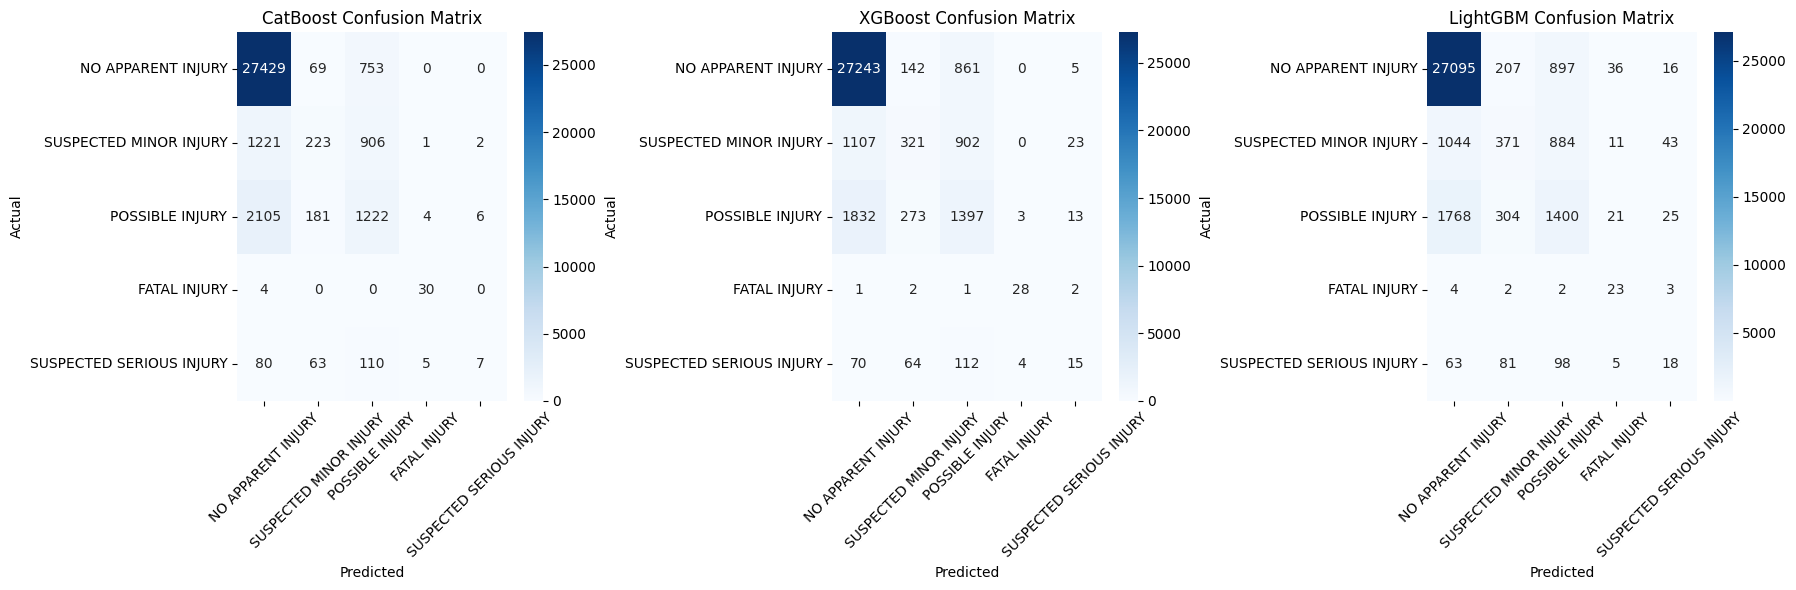

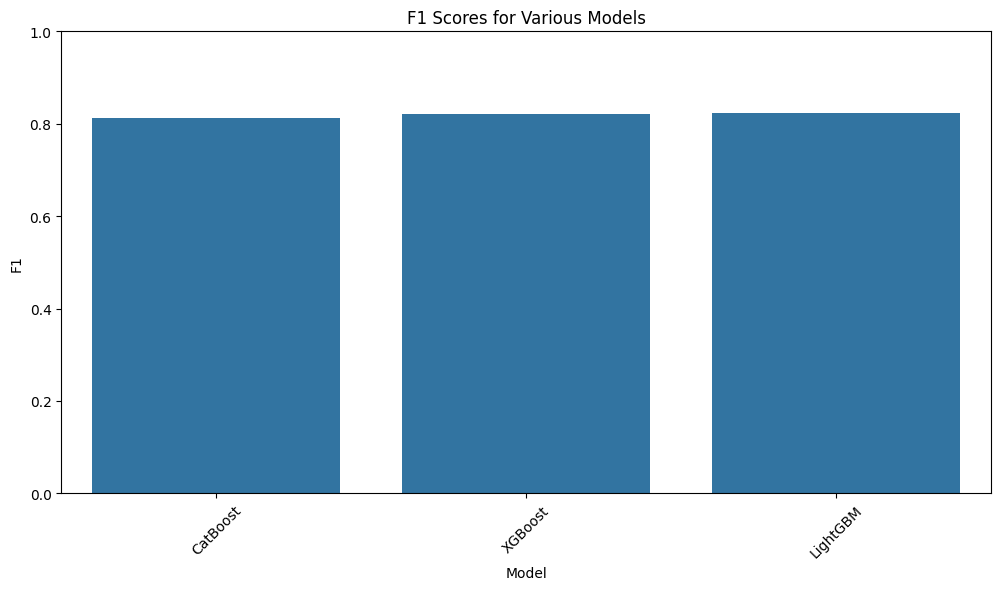

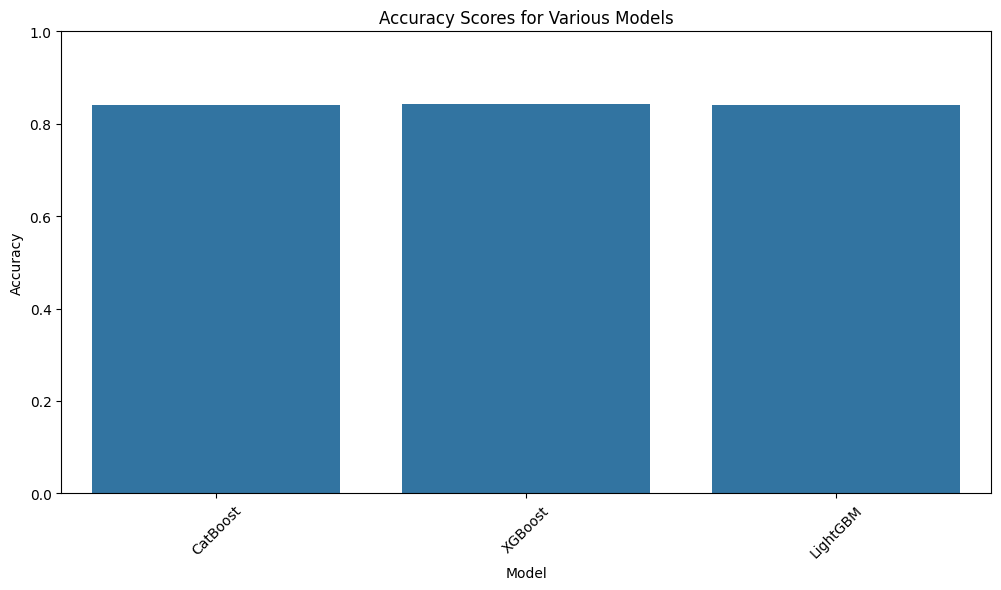

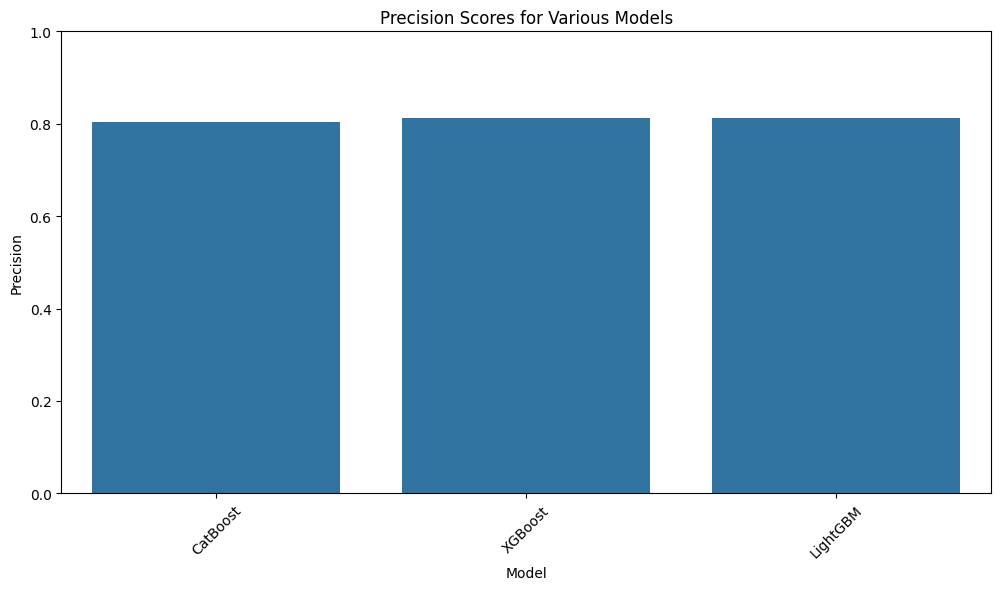

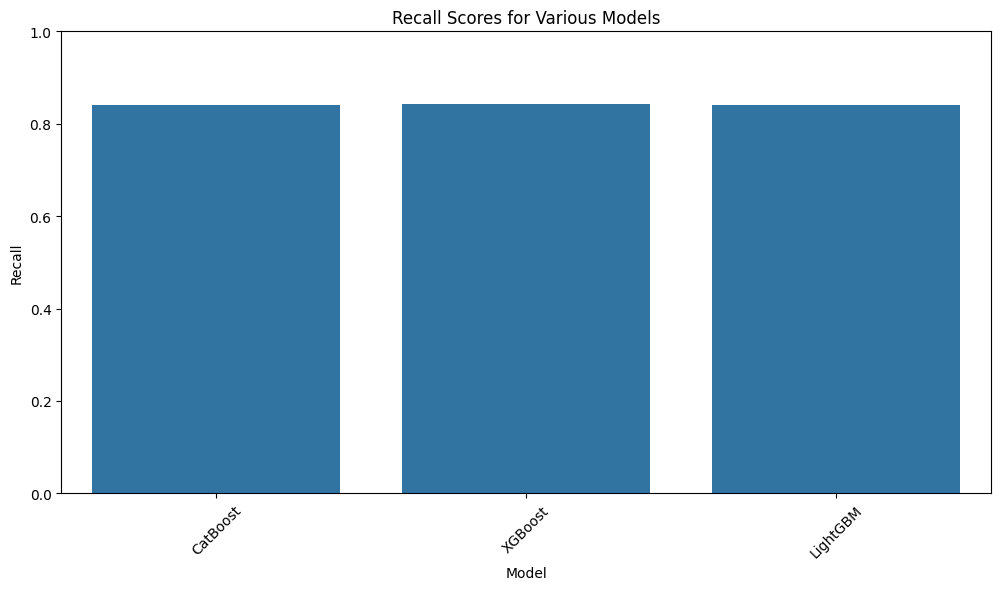

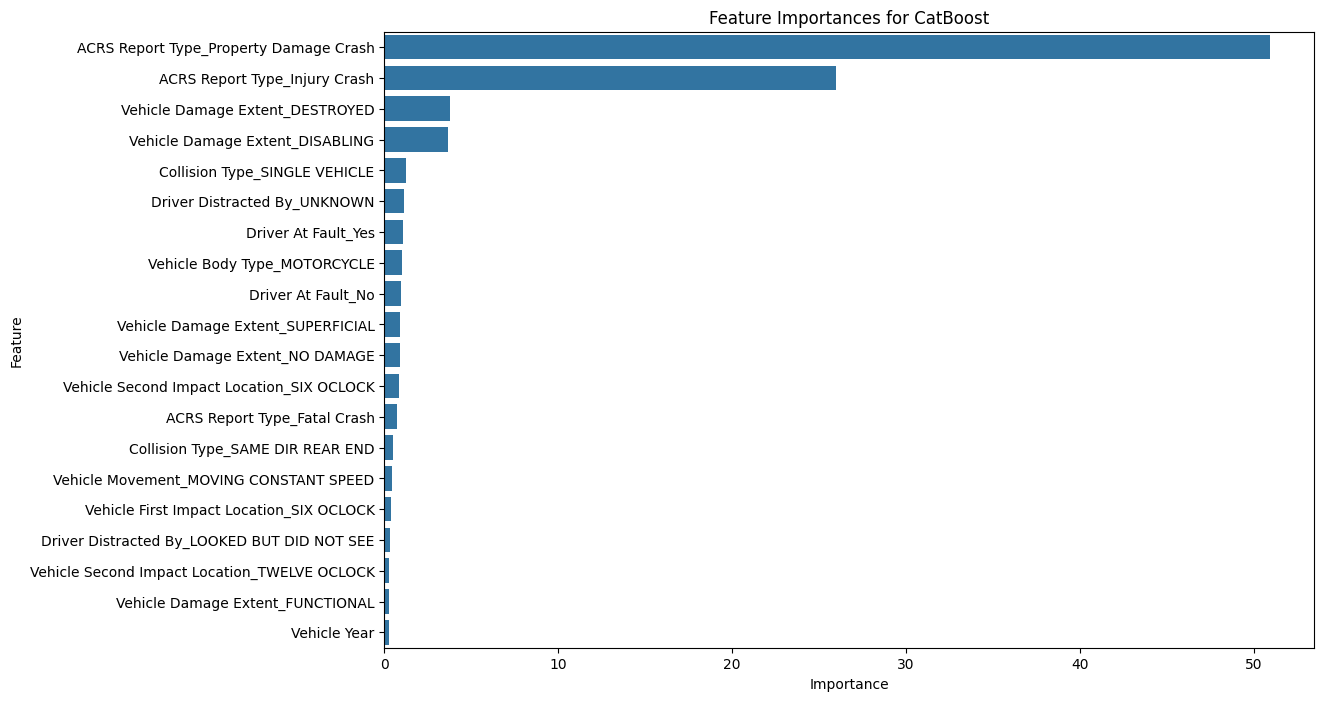

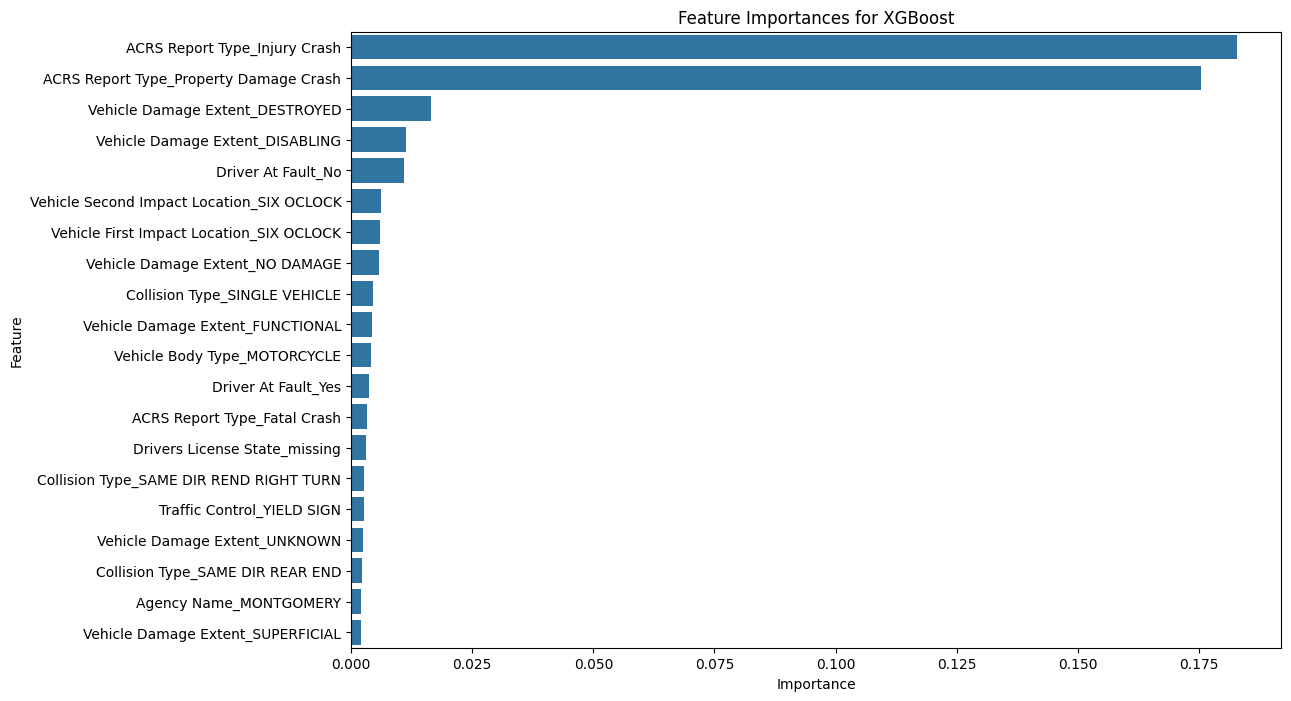

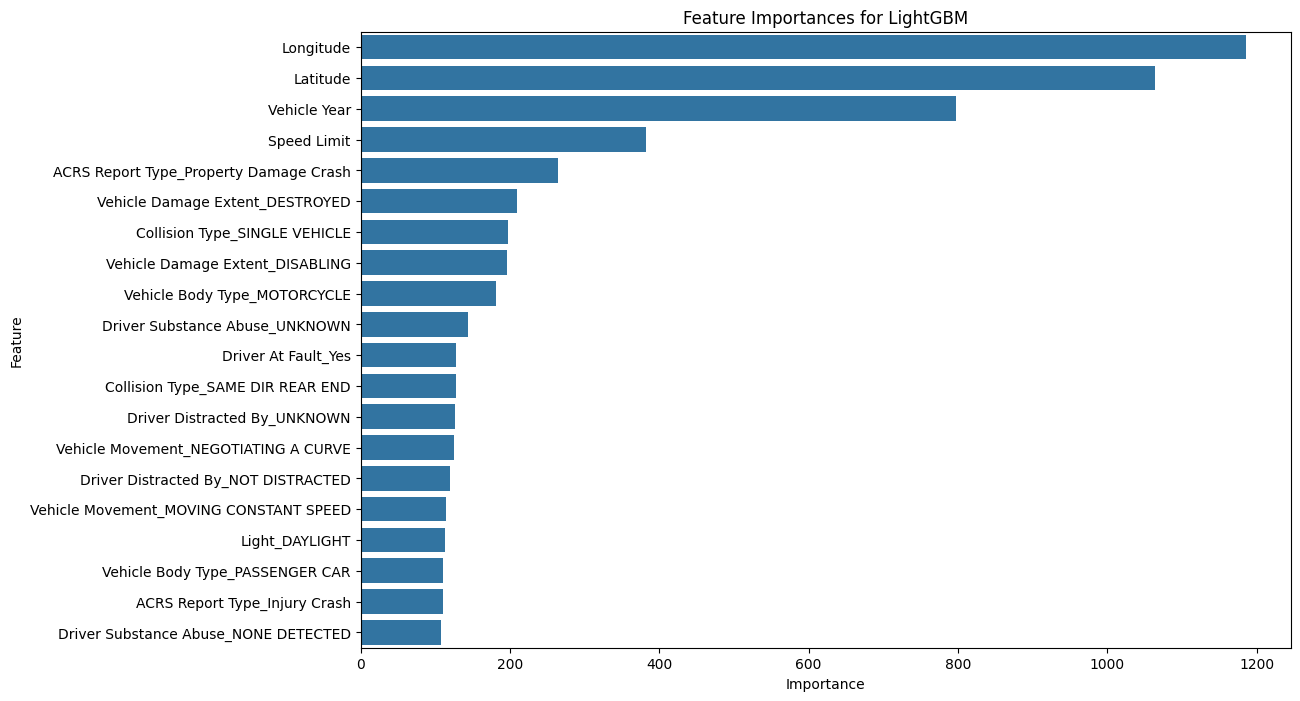

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
choosen_col = ['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
df = df[choosen_col]
target = 'Injury Severity'

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = [col for col in df.select_dtypes(exclude=['number']).columns.tolist() if col != target]

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Splitting data into features and target
X = df.drop(columns=[target])
y = df[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
                        'FATAL INJURY': 3, 'SUSPECTED SERIOUS INJURY': 4})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Dictionary to store results
results = {}
feature_importances = {}

# Loop through models, train and evaluate
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_test = pipeline.predict(X_test)
    
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    
    results[name] = {
        'f1_test': f1_test,
        'accuracy_test': accuracy_test,
        'precision_test': precision_test,
        'recall_test': recall_test,
        'conf_matrix': conf_matrix
    }
    
    # Get feature importances
    feature_importance = model.feature_importances_
    feature_names = numerical_features + preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features).tolist()
    feature_importances[name] = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

# Visualize confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(18, 6))

for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=45)
    ax.set_yticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=0)

plt.tight_layout()
plt.show()

# Visualize metrics
metrics = ['f1', 'accuracy', 'precision', 'recall']
for metric in metrics:
    metric_scores = {
        'Model': [name for name in results.keys()],
        metric.capitalize(): [results[name][f'{metric}_test'] for name in results.keys()]
    }

    metric_df = pd.DataFrame(metric_scores)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric.capitalize(), data=metric_df)
    plt.title(f'{metric.capitalize()} Scores for Various Models')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Visualize feature importances
for name, fi in feature_importances.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=fi.head(20))
    plt.title(f'Feature Importances for {name}')
    plt.show()


In [10]:
pip install pytorch-tabnet


     ---------------------------------------- 0.0/44.5 kB ? eta -:--:--
     ---------------------------------------- 44.5/44.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
     --------------------------------------- 0.5/159.8 MB 16.5 MB/s eta 0:00:10
     --------------------------------------- 1.5/159.8 MB 16.1 MB/s eta 0:00:10
      -------------------------------------- 2.8/159.8 MB 22.0 MB/s eta 0:00:08
      -------------------------------------- 3.9/159.8 MB 22.8 MB/s eta 0:00:07
     - ------------------------------------- 5.5/159.8 MB 25.0 MB/s eta 0:00:07
     - ------------------------------------- 6.9/159.8 MB 25.8 MB/s eta 0:00:06
     - ------------------------------------- 8.1/159.8 MB 26.0 MB/s eta 0:00:06
     -- ------------------------------------ 9.4/159.8 MB 26.2 MB/s eta 0:00:06
     -- ----------------------------------- 10.8/159.8 MB 28.5 MB/s eta 0:00:06
     -- ----------------------------------- 12.1/159.8 


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dropped 'ACRS Report Type'

C:\Users\rushi\AppData\Local\Temp\ipykernel_147376\4014700045.py:17: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
C:\Users\rushi\AppData\Local\Temp\ipykernel_147376\4014700045.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5684
[LightGBM] [Info] Number of data points in the train set: 137684, number of used features: 2547
[LightGBM] [Info] Start training from score -0.198158
[LightGBM] [Info] Start training from score -2.671882
[LightGBM] [Info] Start training from score -2.288479
[LightGBM] [Info] Start training from score -7.053593
[LightGBM] [Info] Start training from score -4.785199


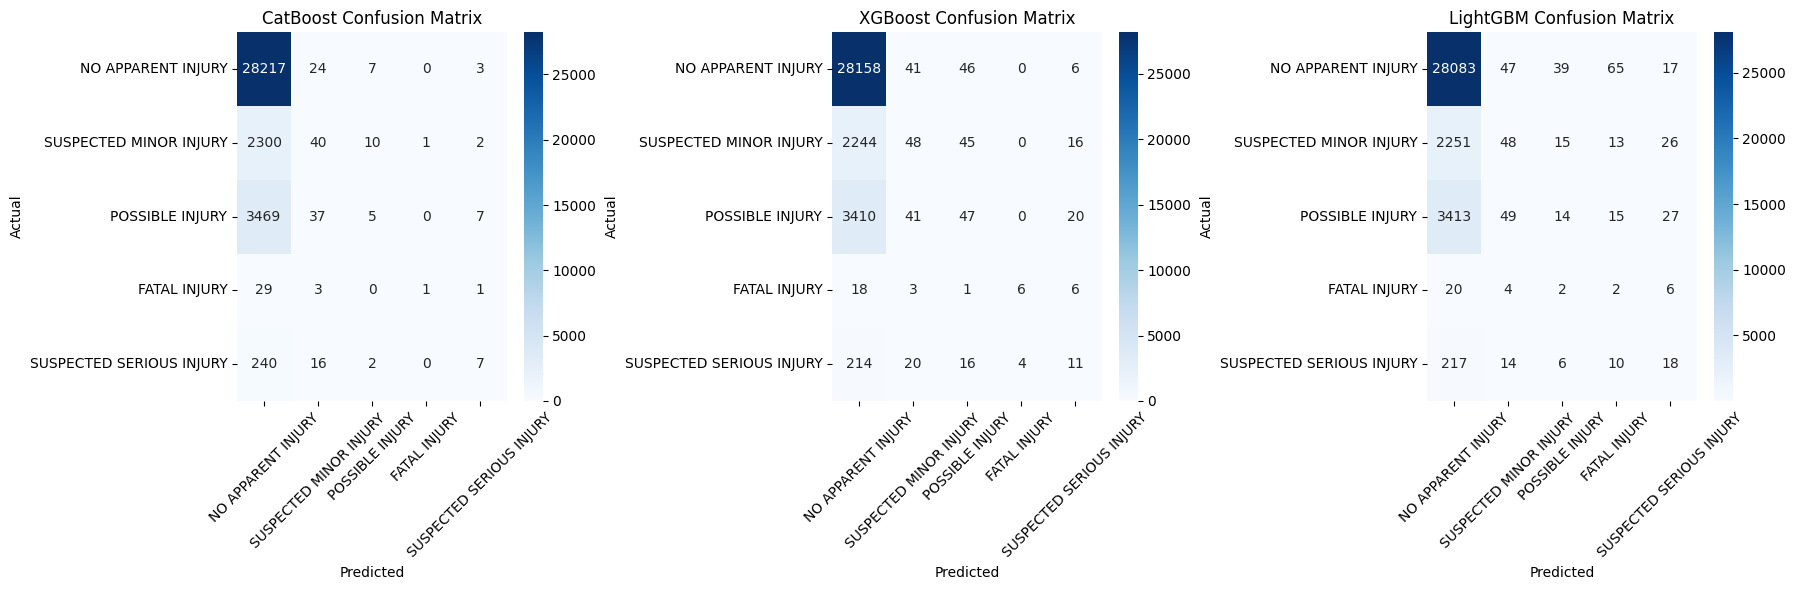

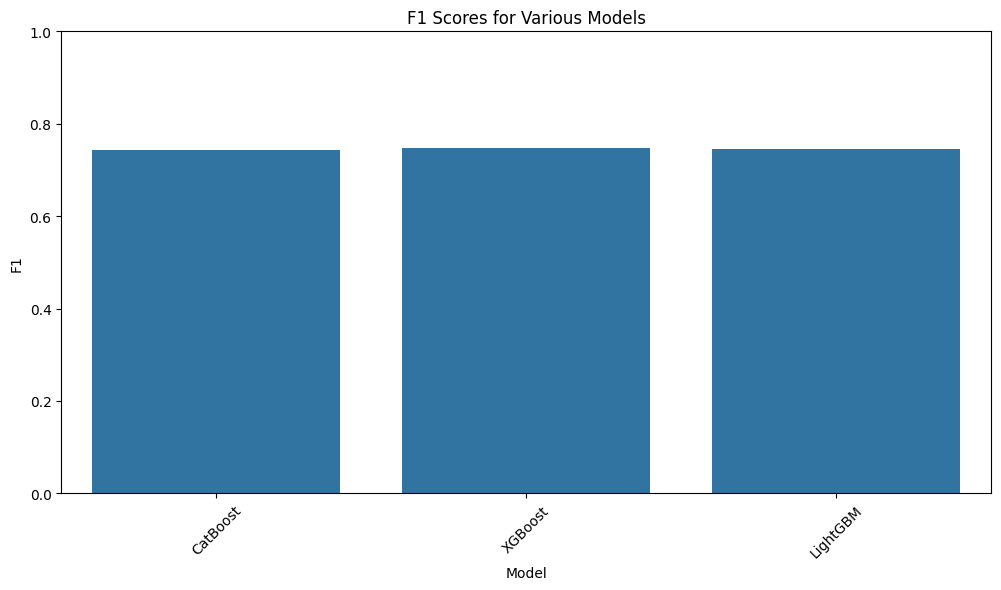

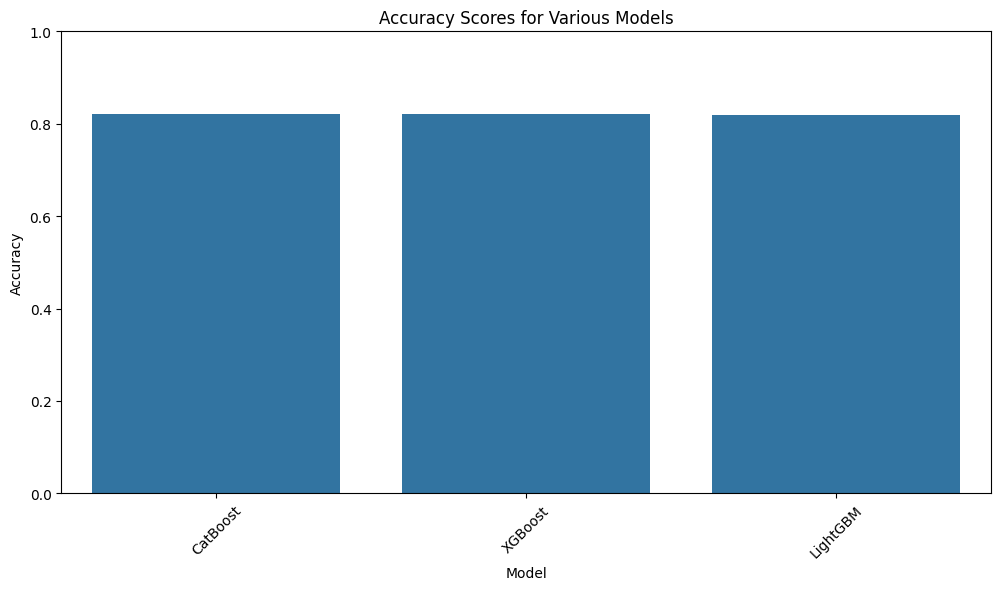

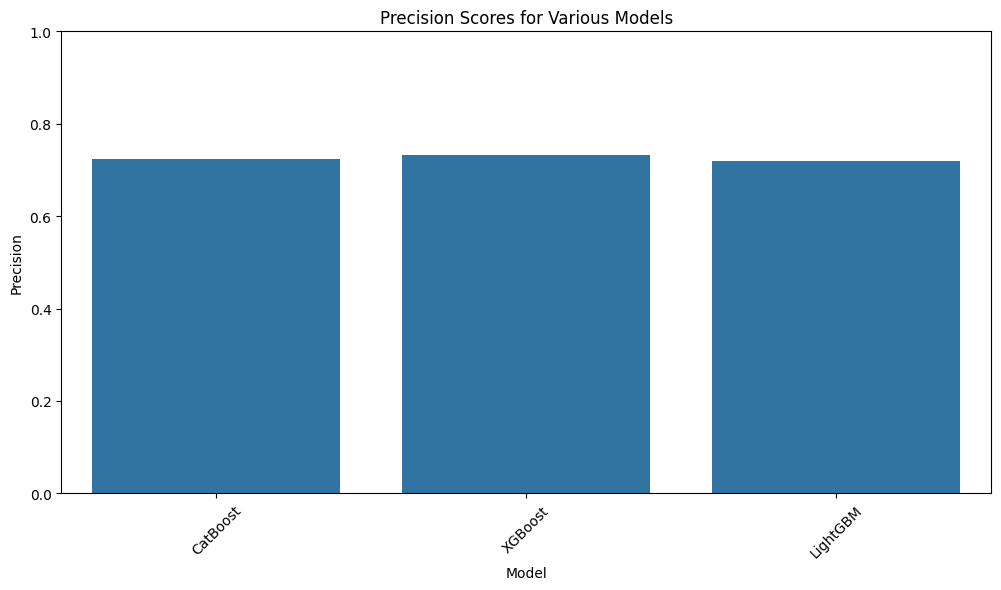

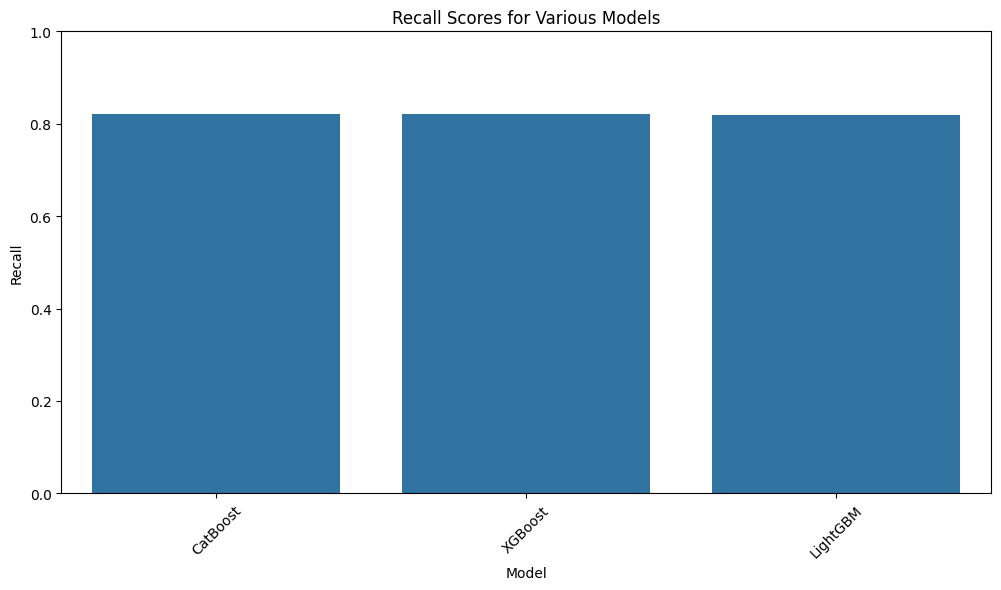

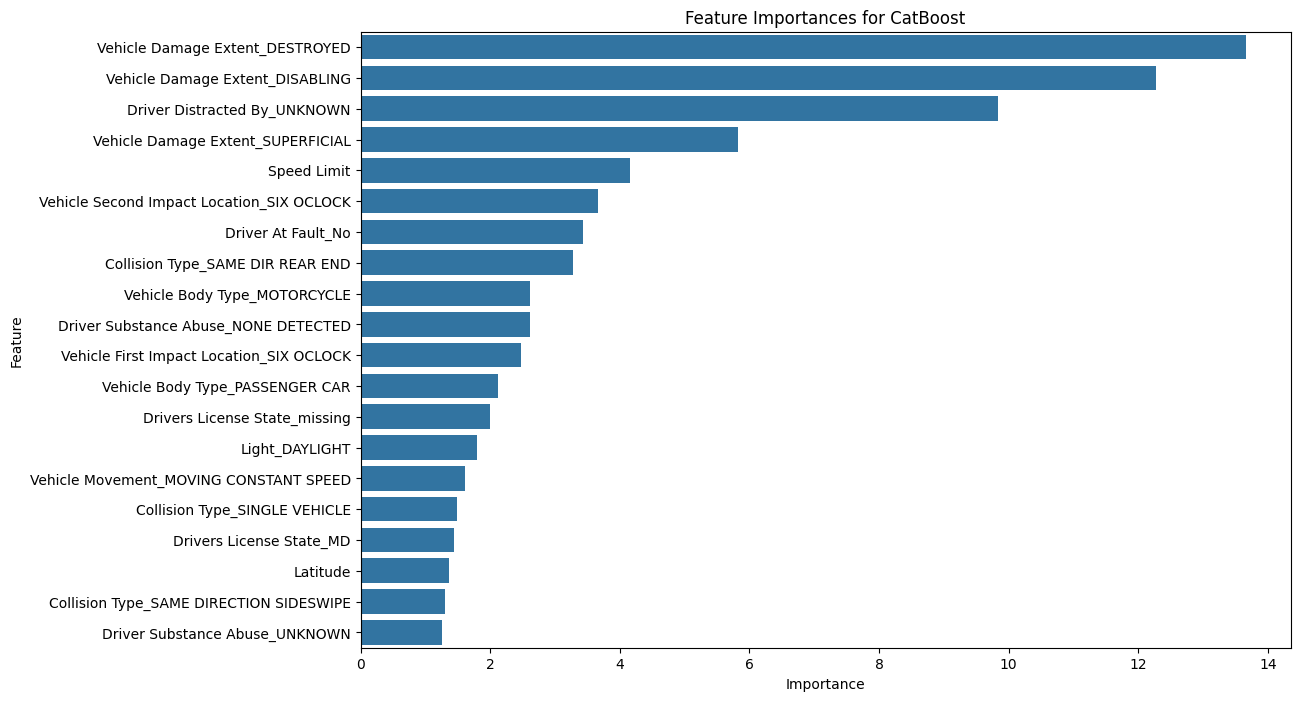

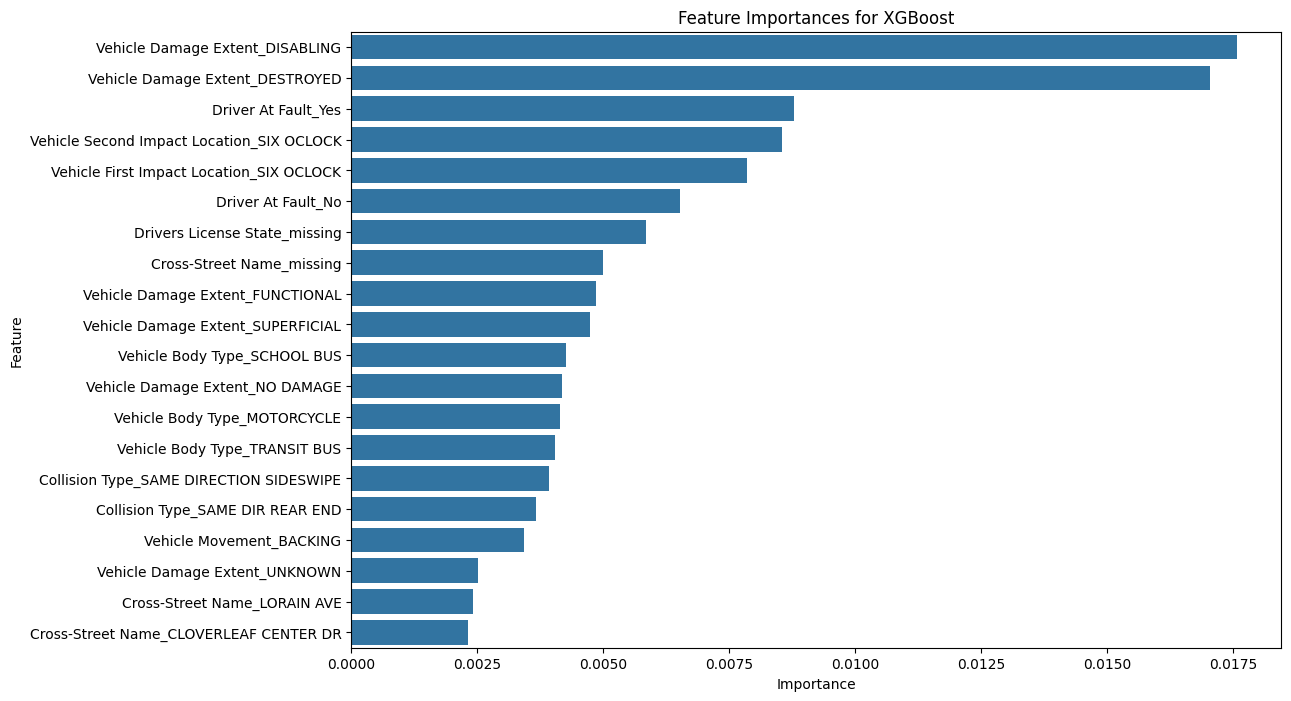

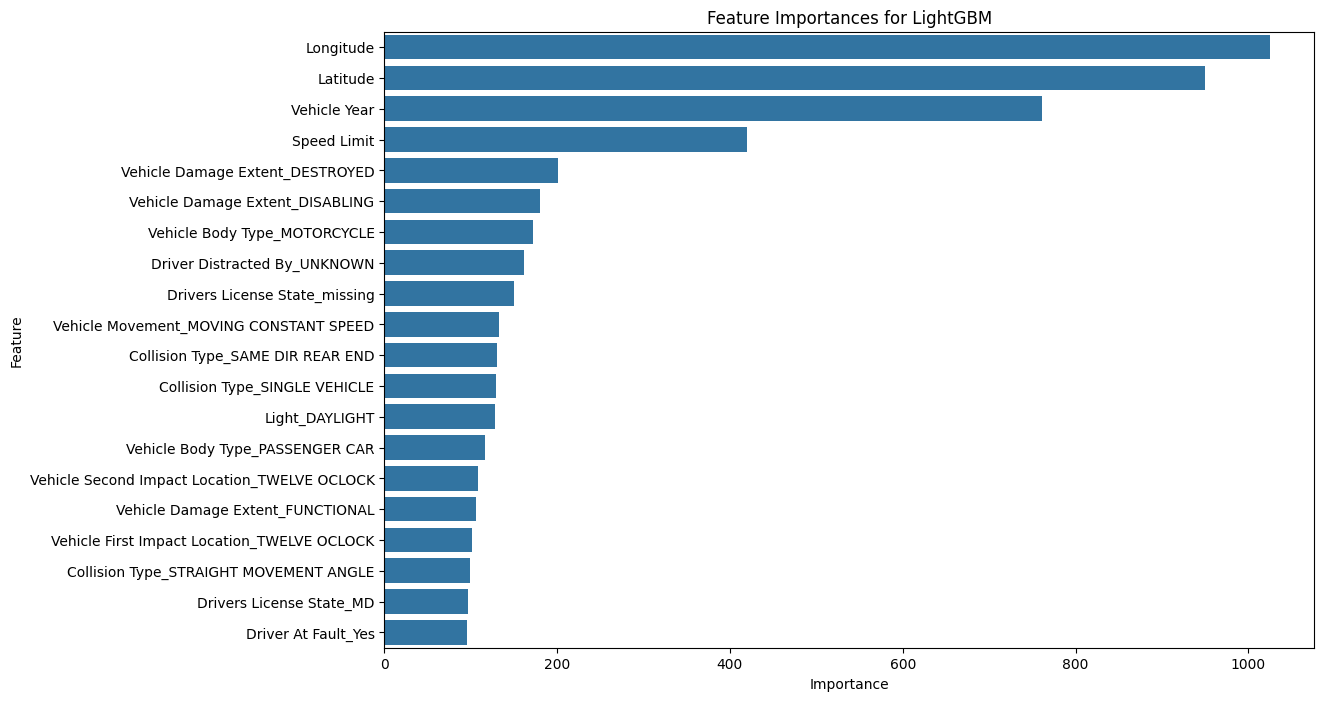

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
choosen_col = ['Agency Name',  'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
df = df[choosen_col]
target = 'Injury Severity'

# Define numerical and categorical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = [col for col in df.select_dtypes(exclude=['number']).columns.tolist() if col != target]

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Splitting data into features and target
X = df.drop(columns=[target])
y = df[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
                        'FATAL INJURY': 3, 'SUSPECTED SERIOUS INJURY': 4})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = [
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Dictionary to store results
results = {}
feature_importances = {}

# Loop through models, train and evaluate
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred_test = pipeline.predict(X_test)
    
    f1_test = f1_score(y_test, y_pred_test, average='weighted')
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='weighted')
    recall_test = recall_score(y_test, y_pred_test, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred_test)
    
    results[name] = {
        'f1_test': f1_test,
        'accuracy_test': accuracy_test,
        'precision_test': precision_test,
        'recall_test': recall_test,
        'conf_matrix': conf_matrix
    }
    
    # Get feature importances
    feature_importance = model.feature_importances_
    feature_names = numerical_features + preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features).tolist()
    feature_importances[name] = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values(by='Importance', ascending=False)

# Visualize confusion matrices
fig, axes = plt.subplots(1, len(models), figsize=(18, 6))

for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=45)
    ax.set_yticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=0)

plt.tight_layout()
plt.show()

# Visualize metrics
metrics = ['f1', 'accuracy', 'precision', 'recall']
for metric in metrics:
    metric_scores = {
        'Model': [name for name in results.keys()],
        metric.capitalize(): [results[name][f'{metric}_test'] for name in results.keys()]
    }

    metric_df = pd.DataFrame(metric_scores)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric.capitalize(), data=metric_df)
    plt.title(f'{metric.capitalize()} Scores for Various Models')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()

# Visualize feature importances
for name, fi in feature_importances.items():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=fi.head(20))
    plt.title(f'Feature Importances for {name}')
    plt.show()


In [10]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


Using device: cpu


C:\Users\rushi\AppData\Local\Temp\ipykernel_8116\3421192787.py:19: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
C:\Users\rushi\AppData\Local\Temp\ipykernel_8116\3421192787.py:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2.21293 | val_0_accuracy: 0.82    |  0:00:43s
epoch 1  | loss: 1.47366 | val_0_accuracy: 0.82    |  0:01:25s
epoch 2  | loss: 0.9939  | val_0_accuracy: 0.82    |  0:02:07s
epoch 3  | loss: 0.75919 | val_0_accuracy: 0.82    |  0:02:48s
epoch 4  | loss: 0.69595 | val_0_accuracy: 0.82    |  0:03:29s
epoch 5  | loss: 0.65688 | val_0_accuracy: 0.82    |  0:04:10s
epoch 6  | loss: 0.64139 | val_0_accuracy: 0.82    |  0:04:51s
epoch 7  | loss: 0.63486 | val_0_accuracy: 0.82    |  0:05:33s
epoch 8  | loss: 0.62688 | val_0_accuracy: 0.82    |  0:06:15s
epoch 9  | loss: 0.62684 | val_0_accuracy: 0.82    |  0:06:57s
epoch 10 | loss: 0.62422 | val_0_accuracy: 0.82    |  0:07:38s

Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_accuracy = 0.82


c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


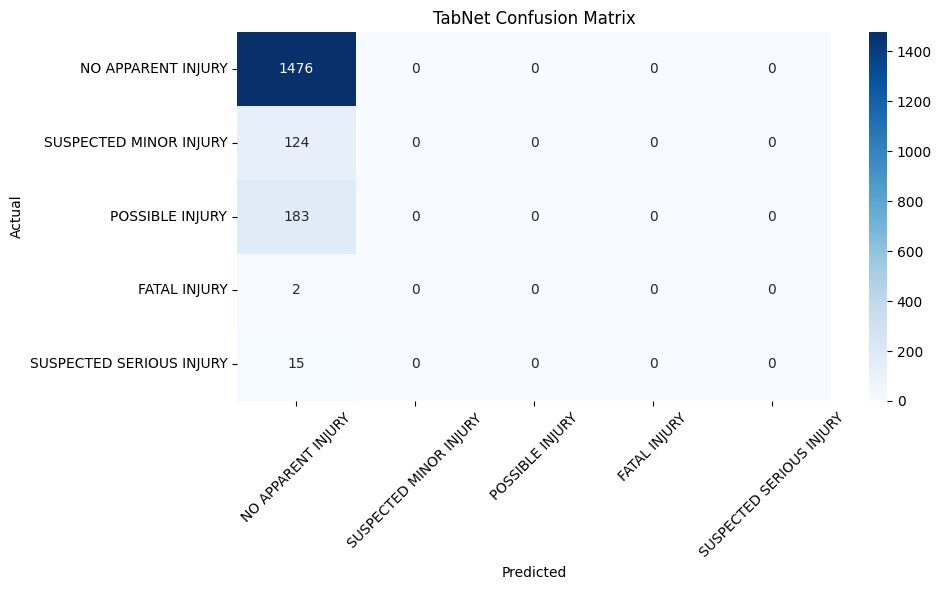

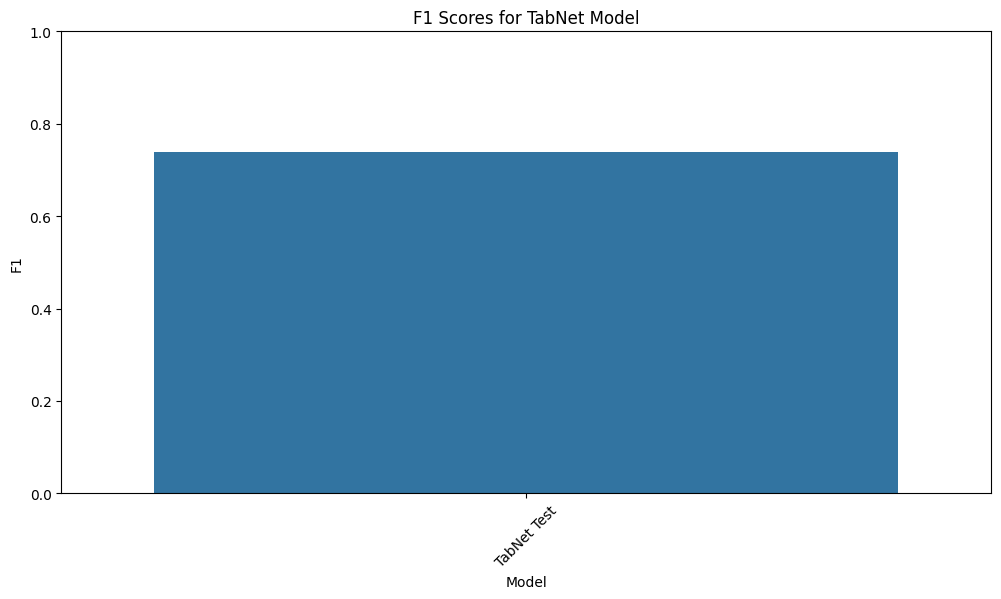

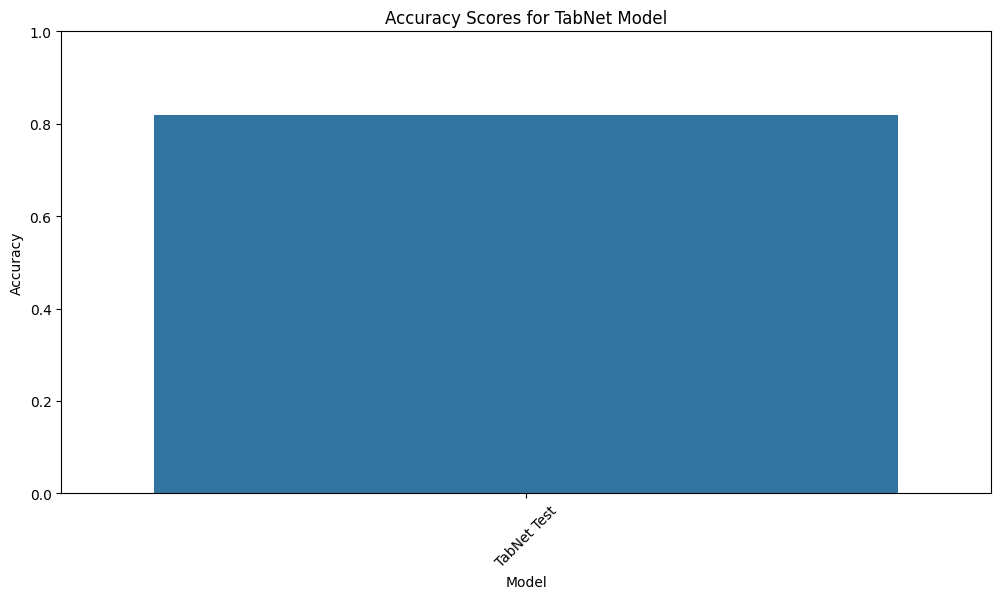

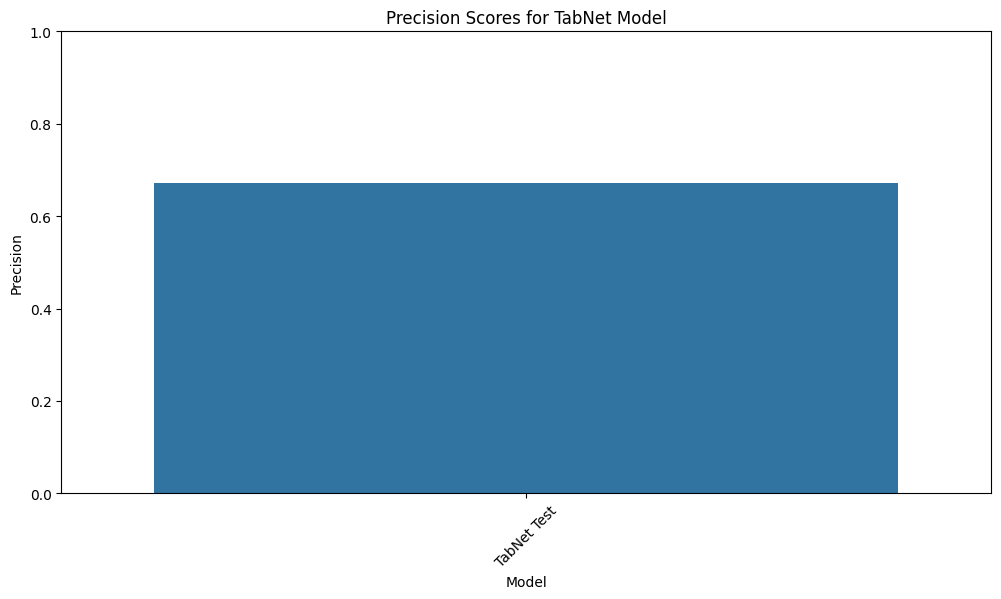

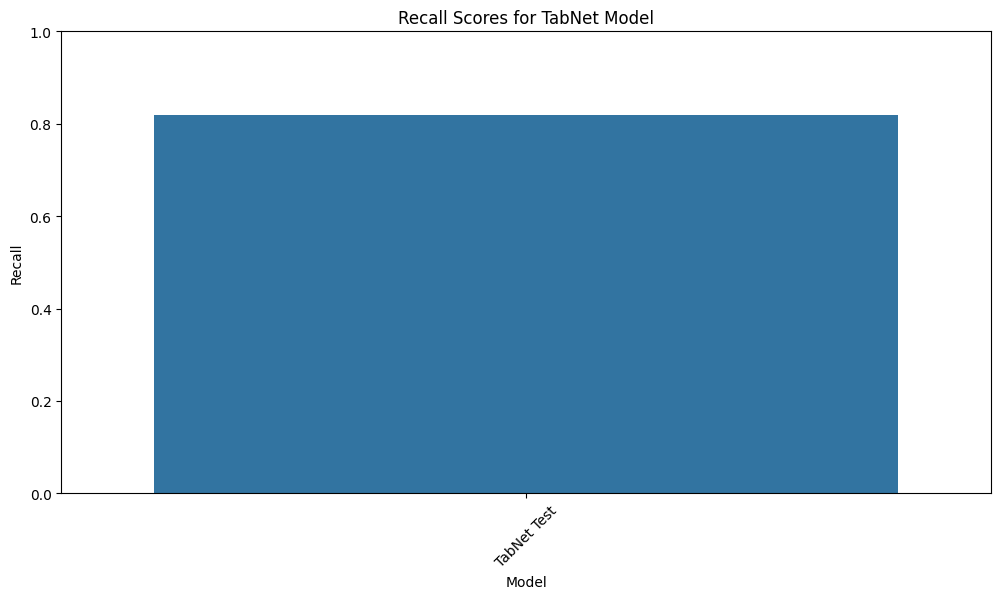

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load the dataset and sample 9900 rows maintaining the target distribution
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
df = df[choosen_col]
target = 'Injury Severity'
df_sampled, _ = train_test_split(df, train_size=9000, stratify=df[target], random_state=42)

# Define numerical and categorical features
numerical_features = df_sampled.select_dtypes(include=['number']).columns.tolist()
categorical_features = [col for col in df_sampled.select_dtypes(exclude=['number']).columns.tolist() if col != target]

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Splitting data into features and target
X = df_sampled.drop(columns=[target])
y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
                                'FATAL INJURY': 3, 'SUSPECTED SERIOUS INJURY': 4})

# Ensure stratified split to have all classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to dense numpy arrays if sparse
if hasattr(X_train_preprocessed, 'toarray'):
    X_train_preprocessed = X_train_preprocessed.toarray()
    X_test_preprocessed = X_test_preprocessed.toarray()

# Initialize TabNetClassifier with device settings
tabnet_clf = TabNetClassifier(device_name=device)

# Train TabNetClassifier and print results for each epoch
tabnet_clf.fit(
    X_train_preprocessed, y_train.values,
    eval_set=[(X_test_preprocessed, y_test.values)],
    max_epochs=13,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    eval_metric=['accuracy']
)

# Predict and evaluate
y_pred_test = tabnet_clf.predict(X_test_preprocessed)

# Calculate metrics
f1_test = f1_score(y_test, y_pred_test, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Store results
results = {
    'TabNet': {
        'f1_test': f1_test,
        'accuracy_test': accuracy_test,
        'precision_test': precision_test,
        'recall_test': recall_test,
        'conf_matrix': conf_matrix
    }
}

# Visualize confusion matrices
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results['TabNet']['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('TabNet Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=45)
ax.set_yticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=0)

plt.tight_layout()
plt.show()

# Visualize metrics
metrics = ['f1', 'accuracy', 'precision', 'recall']
for metric in metrics:
    metric_scores = {
        'Model': ['TabNet Test'],
        metric.capitalize(): [results['TabNet'][f'{metric}_test']]
    }

    metric_df = pd.DataFrame(metric_scores)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric.capitalize(), data=metric_df)
    plt.title(f'{metric.capitalize()} Scores for TabNet Model')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()


Using device: CPU


C:\Users\rushi\AppData\Local\Temp\ipykernel_8116\1333223729.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
C:\Users\rushi\AppData\Local\Temp\ipykernel_8116\1333223729.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super()

Epoch 1/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 30s 119ms/step - accuracy: 0.8078 - loss: 0.7260 - val_accuracy: 0.8202 - val_loss: 0.5833
Epoch 2/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.8180 - loss: 0.5474 - val_accuracy: 0.8207 - val_loss: 0.5669
Epoch 3/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.8284 - loss: 0.4734 - val_accuracy: 0.7985 - val_loss: 0.6021
Epoch 4/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.8540 - loss: 0.3834 - val_accuracy: 0.7949 - val_loss: 0.6220
Epoch 5/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.8763 - loss: 0.3004 - val_accuracy: 0.7722 - val_loss: 0.6789
Epoch 6/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.9130 - loss: 0.2252 - val_accuracy: 0.7879 - val_loss: 0.7820
Epoch 7/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.9363 - loss: 0.1594 - val_accuracy: 0.7672 - val_loss: 0.8426
Epoch 8/20
248/248 ━━━━━━━━━━━━━━━━━━━━ 29s 116ms/step - accuracy: 0.9563 - loss: 0

c:\Users\rushi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


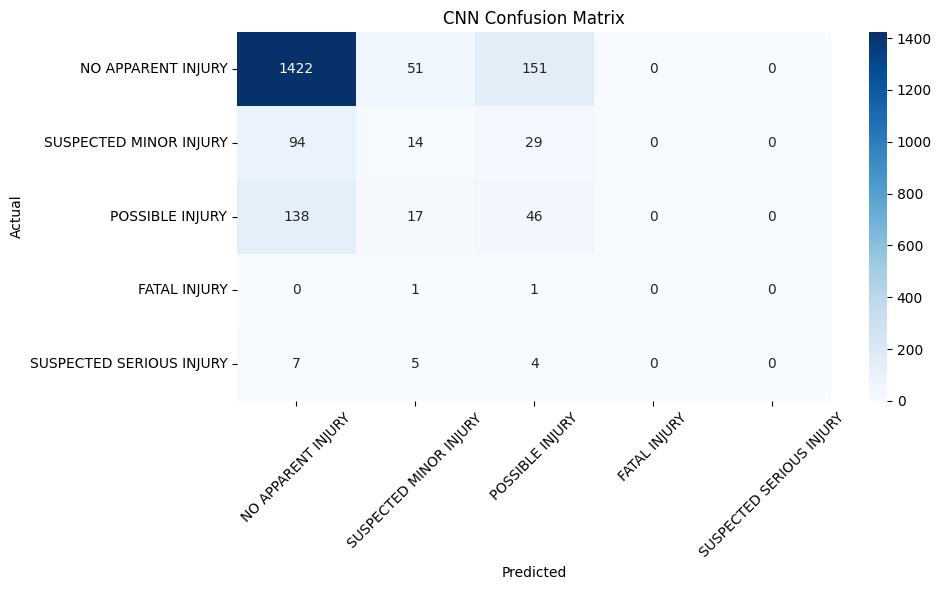

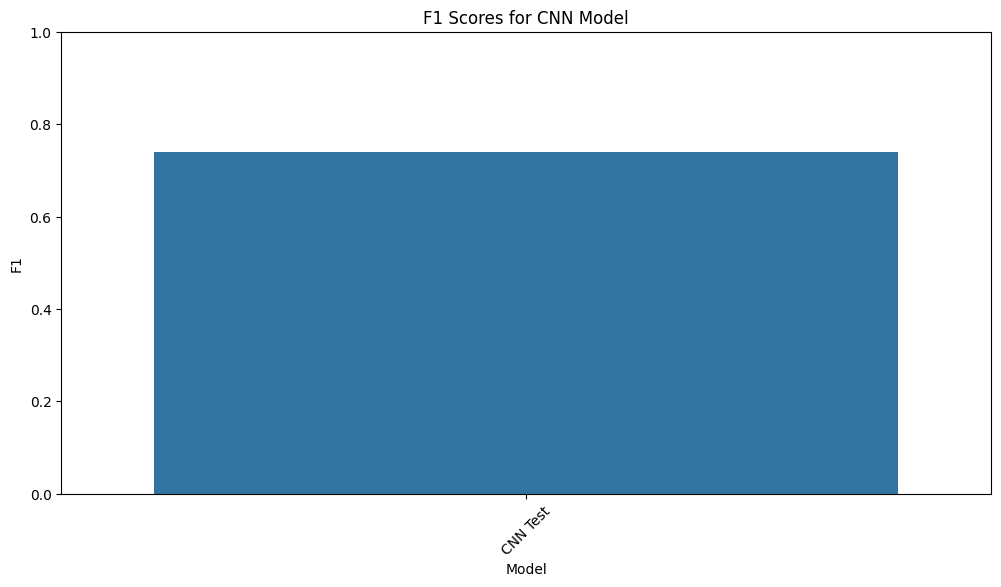

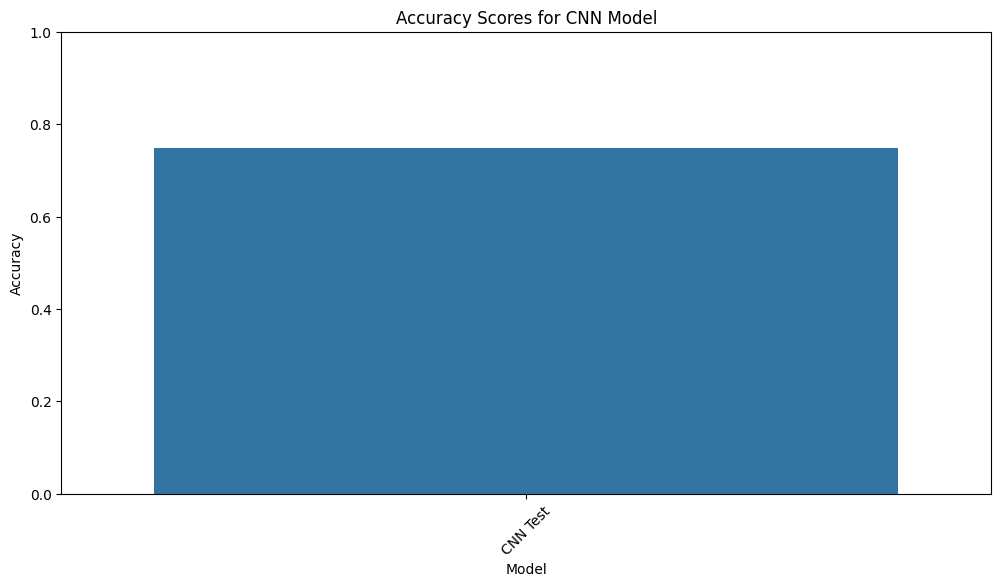

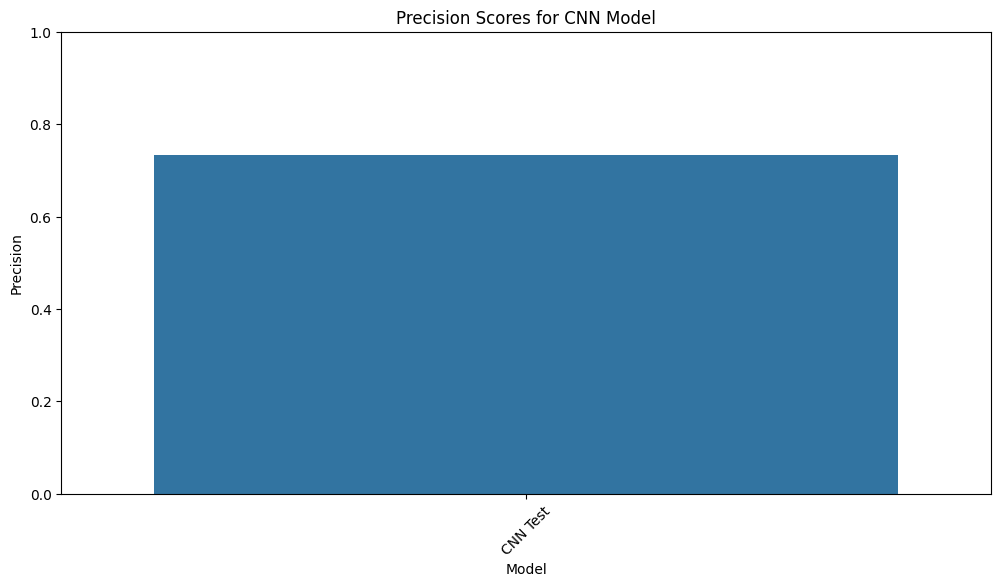

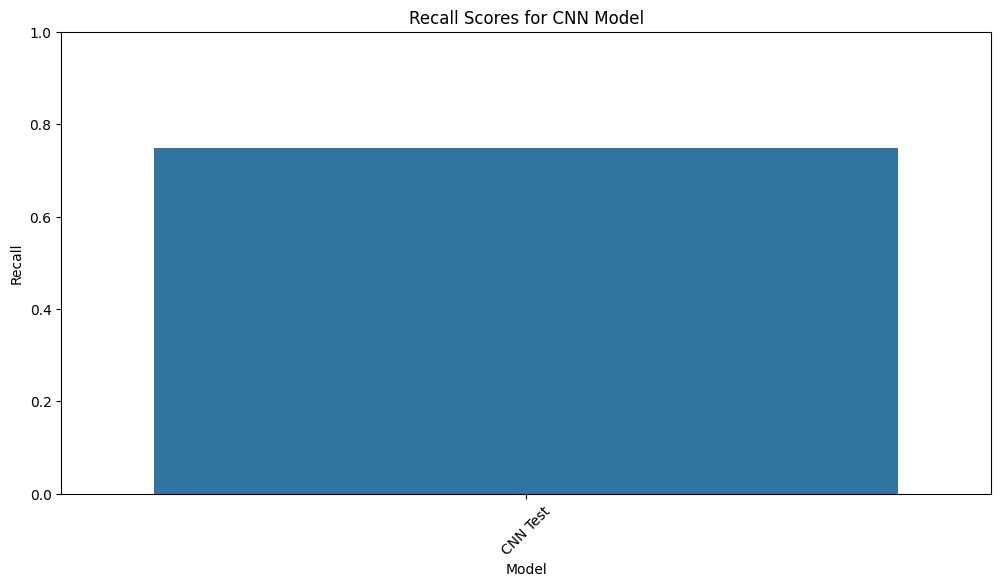

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

# Check if GPU is available
device_name = 'GPU' if tf.config.list_physical_devices('GPU') else 'CPU'
print(f'Using device: {device_name}')

# Load the dataset and sample 9900 rows maintaining the target distribution
choosen_col = ['Agency Name', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')
df = df[choosen_col]
target = 'Injury Severity'

# Ensure stratified sampling to maintain the target distribution
df_sampled, _ = train_test_split(df, train_size=9900, stratify=df[target], random_state=42)

# Define numerical and categorical features
numerical_features = df_sampled.select_dtypes(include=['number']).columns.tolist()
categorical_features = [col for col in df_sampled.select_dtypes(exclude=['number']).columns.tolist() if col != target]

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Splitting data into features and target
X = df_sampled.drop(columns=[target])
y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
                                'FATAL INJURY': 3, 'SUSPECTED SERIOUS INJURY': 4})

# Ensure stratified split to have all classes in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert to dense numpy arrays if sparse
if hasattr(X_train_preprocessed, 'toarray'):
    X_train_preprocessed = X_train_preprocessed.toarray()
    X_test_preprocessed = X_test_preprocessed.toarray()

# Reshape data for Conv1D (samples, timesteps, features)
X_train_preprocessed = X_train_preprocessed.reshape((X_train_preprocessed.shape[0], X_train_preprocessed.shape[1], 1))
X_test_preprocessed = X_test_preprocessed.reshape((X_test_preprocessed.shape[0], X_test_preprocessed.shape[1], 1))

# Convert labels to categorical one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Define the CNN model
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')  # Number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model
input_shape = (X_train_preprocessed.shape[1], 1)
cnn_model = create_cnn_model(input_shape)

# Train the model
history = cnn_model.fit(X_train_preprocessed, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_preprocessed, y_test_categorical))

# Evaluate the model
y_pred_test = cnn_model.predict(X_test_preprocessed)

y_pred_test_classes = y_pred_test.argmax(axis=1)

# Calculate metrics
f1_test = f1_score(y_test, y_pred_test_classes, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred_test_classes)
precision_test = precision_score(y_test, y_pred_test_classes, average='weighted')
recall_test = recall_score(y_test, y_pred_test_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_test_classes)

# Store results
results = {
    'CNN': {
        'f1_test': f1_test,
        'accuracy_test': accuracy_test,
        'precision_test': precision_test,
        'recall_test': recall_test,
        'conf_matrix': conf_matrix
    }
}

# Visualize confusion matrices
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(results['CNN']['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('CNN Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_xticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=45)
ax.set_yticklabels(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY', 'FATAL INJURY', 'SUSPECTED SERIOUS INJURY'], rotation=0)

plt.tight_layout()
plt.show()

# Visualize metrics
metrics = ['f1', 'accuracy', 'precision', 'recall']
for metric in metrics:
    metric_scores = {
        'Model': ['CNN Test'],
        metric.capitalize(): [results['CNN'][f'{metric}_test']]
    }

    metric_df = pd.DataFrame(metric_scores)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y=metric.capitalize(), data=metric_df)
    plt.title(f'{metric.capitalize()} Scores for CNN Model')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

choosen_col = ['Agency Name', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude', 'Longitude']
df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')[choosen_col]
target = 'Injury Severity'

# Ensure stratified sampling to maintain the target distribution
df_sampled, _ = train_test_split(df, train_size=10000, stratify=df[target], random_state=42)

# Define numerical and categorical features
numerical_features = df_sampled.select_dtypes(include=['number']).columns.tolist()
categorical_features = [col for col in df_sampled.select_dtypes(exclude=['number']).columns.tolist() if col != target]

# Preprocessing pipeline with imputation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Splitting data into features and target
X = df_sampled.drop(columns=[target])
y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,
                                'FATAL INJURY': 3, 'SUSPECTED SERIOUS INJURY': 4})

# Preprocess the features
X_preprocessed = preprocessor.fit_transform(X)

# Convert sparse matrix to dense
if hasattr(X_preprocessed, 'toarray'):
    X_preprocessed = X_preprocessed.toarray()

# Apply Agglomerative Clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=5)
clusters = agglomerative_clustering.fit_predict(X_preprocessed)

# Add clusters to the original dataframe
df['Cluster'] = clusters

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Agglomerative Clustering Results (PCA Reduced)')
plt.show()


C:\Users\rushi\AppData\Local\Temp\ipykernel_162312\2416181819.py:13: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Crash_Reporting_-_Drivers_Data.csv')[choosen_col]
C:\Users\rushi\AppData\Local\Temp\ipykernel_162312\2416181819.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df_sampled[target].replace({'NO APPARENT INJURY': 0, 'SUSPECTED MINOR INJURY': 1, 'POSSIBLE INJURY': 2,


ValueError: Length of values (10000) does not match length of index (172105)